In [ ]:
# importing matplot library to plot data
import matplotlib.pyplot as plt
%matplotlib inline
# importing tensorflow and datasets, layers and model from tensorlow keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# importing keras earlystopping to avoid overfitting
from keras.callbacks import EarlyStopping
# importing numpy to apply any numpy operations
import numpy as np

# Question 1: Cifar10 dataset

In [ ]:
# loadind cifar10 train and test data from keras datasets
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# printing shapes of train and test data
print('x_train:',x_train.shape,'y_train',y_train.shape)
print('x_test:',x_test.shape,'y_test:',y_test.shape)

x_train: (50000, 32, 32, 3) y_train (50000, 1)
x_test: (10000, 32, 32, 3) y_test: (10000, 1)


In [ ]:
# we can see there 50000 rows in train dataset and each row has width and height of 32 in all 3 channels of RGB 
x_train[0].shape

(32, 32, 3)

# Question 2: plot image from each class

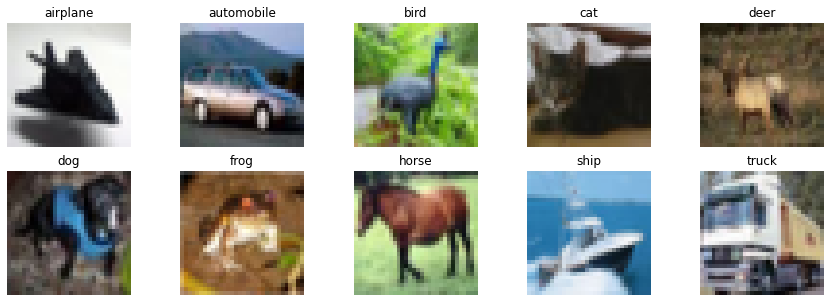

In [ ]:
#creating figure of size 15 by 5 to plot 10 images in 2 by 5 matrix
fig = plt.figure(figsize=(15,5))
rows=2
cols=5
# creating list of all names of classes 
cifar_classes= ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(10):
  # using index of labels data and taking the index value of it to plot that perticular image from features data 
  indexl=list(y_train).index(i)
  plt.subplot(rows, cols, i + 1)
  # remove grids and axis to plot images clearly
  plt.grid(b=False) 
  plt.axis("off")
  # using imshow to plot array as image
  plt.imshow(x_train[indexl])
  plt.title(cifar_classes[i])
plt.show()

# Question 3: Train model with different learning rate, kernal size, stride, epochs etc.,

In [ ]:
basic_model = models.Sequential([
                             # creating convolutional layers with filters, kernal size, input shape and padding as same.
                             # padding same is used to pad with 1 and not loose even any small information from data and keep the size of input same
                             layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='SAME'),
                             layers.Conv2D(64, (3, 3), activation='relu', padding='SAME'),
                             # max pooling is used to downsample the data and use max value from the size of pool where max value has useful information from any grid of its size 
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(64, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             # falltening the layers to bring it in one dimension
                             layers.Flatten(),
                             layers.Dense(128,activation='relu'),
                             # creating last layer with 10 nodes as the number of classes
                             layers.Dense(10)
                             ])

In [ ]:
# creating optimizer
basic_opt = tf.keras.optimizers.SGD(lr=0.001)
# using early stopping to monitor validation data's loss value with mode min as we need loss as minimum as possible and patience helps in keeping track limit 
# if the loss is increasing for 5 epoch the model stops using call backs 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# compiling model with accuracy metric 
basic_model.compile(optimizer=basic_opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#fitting the model with train data with batch size 32 and using 20% of train data for validation
basic_history = basic_model.fit(x_train, y_train, epochs=50, batch_size=32,verbose=2,validation_split=0.2, callbacks=[es])

Epoch 1/50
1250/1250 - 5s - loss: 1.8746 - accuracy: 0.3490 - val_loss: 1.5989 - val_accuracy: 0.4285
Epoch 2/50
1250/1250 - 5s - loss: 1.4766 - accuracy: 0.4686 - val_loss: 1.4143 - val_accuracy: 0.4956
Epoch 3/50
1250/1250 - 5s - loss: 1.3230 - accuracy: 0.5281 - val_loss: 1.2940 - val_accuracy: 0.5491
Epoch 4/50
1250/1250 - 5s - loss: 1.2184 - accuracy: 0.5709 - val_loss: 1.2671 - val_accuracy: 0.5640
Epoch 5/50
1250/1250 - 5s - loss: 1.1414 - accuracy: 0.5976 - val_loss: 1.1645 - val_accuracy: 0.6021
Epoch 6/50
1250/1250 - 5s - loss: 1.0748 - accuracy: 0.6210 - val_loss: 1.1246 - val_accuracy: 0.6132
Epoch 7/50
1250/1250 - 5s - loss: 1.0271 - accuracy: 0.6411 - val_loss: 1.1104 - val_accuracy: 0.6186
Epoch 8/50
1250/1250 - 5s - loss: 0.9858 - accuracy: 0.6562 - val_loss: 1.0947 - val_accuracy: 0.6213
Epoch 9/50
1250/1250 - 5s - loss: 0.9467 - accuracy: 0.6705 - val_loss: 1.0590 - val_accuracy: 0.6418
Epoch 10/50
1250/1250 - 5s - loss: 0.9102 - accuracy: 0.6842 - val_loss: 1.0707 - 

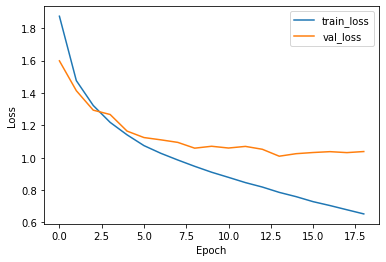

In [ ]:
#Plotting loss of model
plt.plot(basic_history.history['loss'], label='train_loss')
plt.plot(basic_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

313/313 - 1s - loss: 1.0363 - accuracy: 0.6603
Test Loss:  1.036264419555664  , Test Accuracy:  0.6603000164031982


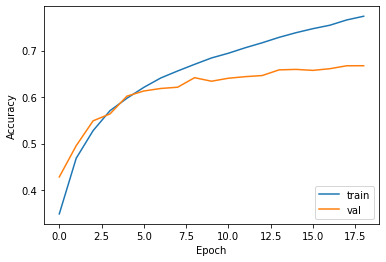

In [ ]:
# plotting accuracy of validation data
plt.plot(basic_history.history['accuracy'], label='train')
plt.plot(basic_history.history['val_accuracy'], label = 'val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# printing test accuracy and loss
test_loss, test_acc = basic_model.evaluate(x_test,  y_test, verbose=2)
print('Test Loss: ',test_loss,' , Test Accuracy: ',test_acc)

learning rate: it helps in taking steps towards minima

1.   0.0001 model is very slow, test accuracy after 50 epochs was 60%
2.   0.0005 test accuracy after 50 epochs was 62%
3.   0.01 accuracy was stuck at 10 % as the learning rate was very high for the model due to which it was overfitting

Therefore 0.001 is better than all.   

Stride : the stride size helps in considering how many columns to skip after applying kernal on data

1.   increasing stride from 1 to 2 did not bring good results as accuracy was  58%. So with stride 1 we got our best results.

Kernal size: this helps in choosing size of weights to capture any minute or major information from data

1.   accuracy was 53%
2.   accuracy was 65.2 %
3.   accuracy was 66.03%
4.   accuracy was 65%
5.   accuracy was 63%

Out of all kernal sizes, kernal size 3 gave best accuracy, So for 1'st question model basic model above compiled and plotted was the best model with parameters kernal size=(3,3), stride=1, SGD optimizer with learning rate of 0.001 with low varience in accuracy and loss compared with models of other parameters. There is some overfitting happening but it can reduced by normalizing the data. 


# Question 4 : Normalizing the data

In [ ]:
# Normalizing the data to bring the values between 0 and 1 so the varience is less in the data and predictions will be better
# here to normalize the data we divide all images array with 255 as the pixels values will be between 0 - 255 in RGB 
x_train_norm = x_train/255
x_test_norm = x_test/255

In [ ]:
# creating a new base model for this question to notice changes in results
base_model2 = models.Sequential([
                             layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='SAME'),
                             layers.Conv2D(64, (3, 3), activation='relu', padding='SAME'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(64, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Flatten(),
                             layers.Dense(128,activation='relu'),
                             layers.Dense(10)
                             ])

In [ ]:
base_opt2 = tf.keras.optimizers.Adam(lr=0.001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
base_model2.compile(optimizer=base_opt2, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

base_history2 = base_model2.fit(x_train_norm, y_train, epochs=100, batch_size=32,verbose=2,validation_split=0.2, callbacks=[es])

Epoch 1/100
1250/1250 - 5s - loss: 1.4027 - accuracy: 0.4982 - val_loss: 1.1335 - val_accuracy: 0.5933
Epoch 2/100
1250/1250 - 5s - loss: 0.9536 - accuracy: 0.6677 - val_loss: 0.8904 - val_accuracy: 0.6916
Epoch 3/100
1250/1250 - 5s - loss: 0.7893 - accuracy: 0.7247 - val_loss: 0.8300 - val_accuracy: 0.7063
Epoch 4/100
1250/1250 - 5s - loss: 0.6780 - accuracy: 0.7616 - val_loss: 0.8106 - val_accuracy: 0.7221
Epoch 5/100
1250/1250 - 5s - loss: 0.5889 - accuracy: 0.7937 - val_loss: 0.8050 - val_accuracy: 0.7203
Epoch 6/100
1250/1250 - 5s - loss: 0.5006 - accuracy: 0.8238 - val_loss: 0.8221 - val_accuracy: 0.7284
Epoch 7/100
1250/1250 - 5s - loss: 0.4210 - accuracy: 0.8525 - val_loss: 0.8541 - val_accuracy: 0.7325
Epoch 8/100
1250/1250 - 5s - loss: 0.3516 - accuracy: 0.8763 - val_loss: 0.9303 - val_accuracy: 0.7278
Epoch 9/100
1250/1250 - 5s - loss: 0.2903 - accuracy: 0.8966 - val_loss: 1.1077 - val_accuracy: 0.7157
Epoch 10/100
1250/1250 - 5s - loss: 0.2413 - accuracy: 0.9125 - val_loss:

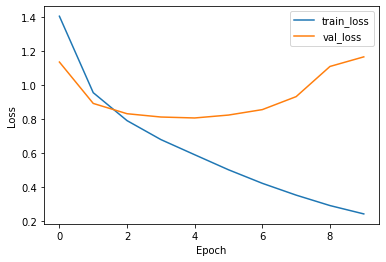

In [ ]:
plt.plot(base_history2.history['loss'], label='train_loss')
plt.plot(base_history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

313/313 - 1s - loss: 1.1822 - accuracy: 0.7141
Test Loss:  1.1821554899215698  , Test Accuracy:  0.7141000032424927


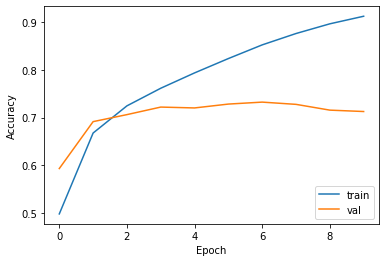

In [ ]:
plt.plot(base_history2.history['accuracy'], label='train')
plt.plot(base_history2.history['val_accuracy'], label = 'val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = base_model2.evaluate(x_test_norm,  y_test, verbose=2)
print('Test Loss: ',test_loss,' , Test Accuracy: ',test_acc)

Trying different optimizers with Normalized data to observe any better results with different optimizer: 

1.   SGD: 
*   With base model kernal size 3 and stride 1 the accuracy was 63.77% with low varience and with stride2 56.01%, so no we know stride 2 is not good for the model.
*   kernal size 2 the accuracy was 61.21
*   kernal size 4 the accuracy is 63.59%
*   kernal size 5 accuracy 62.58%.

2.  Adam : with lr 0.001 and kernal size 3 accuracy was 70.73% with little more varience, with 0.01 accuracy was 0.10 %

3.   RMSprop : 0.001 with size 3 accuracy was 67.64% with high varience, with 0.01 accuracy was 0.10 %

##From the above results Adam Optimizer gave best results but with more varience in it so I find that model with SGD optimizer with learning rate of 0.001 and kernal size 3 and 4 gave similar results even after normalization but important thing to notice was the varience in results was very low! compared to other optimizers

# Question 5: different activation functions

In [ ]:
# creating model with LeakyRelu optimizer
base_model3 = models.Sequential([
                             layers.Conv2D(32, (4, 4), input_shape=(32, 32, 3), padding='SAME'),
                             layers.LeakyReLU(alpha=0.001),
                             layers.Conv2D(64, (4, 4), padding='SAME'),
                             layers.LeakyReLU(alpha=0.001),
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(64, (4, 4)),
                             layers.LeakyReLU(alpha=0.001),
                             layers.MaxPooling2D((2, 2)),
                             layers.Flatten(),
                             layers.Dense(128),
                             layers.LeakyReLU(alpha=0.001),
                             layers.Dense(10)
                             ])

In [ ]:
base_opt3 = tf.keras.optimizers.SGD(lr=0.001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
base_model3.compile(optimizer=base_opt3, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

base_history3 = base_model3.fit(x_train_norm, y_train, epochs=100, batch_size=32,verbose=2,validation_split=0.2, callbacks=[es])

Epoch 1/100
1250/1250 - 8s - loss: 2.2795 - accuracy: 0.1332 - val_loss: 2.2455 - val_accuracy: 0.1746
Epoch 2/100
1250/1250 - 8s - loss: 2.1564 - accuracy: 0.2284 - val_loss: 2.0499 - val_accuracy: 0.2551
Epoch 3/100
1250/1250 - 8s - loss: 1.9749 - accuracy: 0.2906 - val_loss: 1.9590 - val_accuracy: 0.3055
Epoch 4/100
1250/1250 - 8s - loss: 1.8884 - accuracy: 0.3295 - val_loss: 1.8544 - val_accuracy: 0.3415
Epoch 5/100
1250/1250 - 8s - loss: 1.8008 - accuracy: 0.3634 - val_loss: 1.7669 - val_accuracy: 0.3743
Epoch 6/100
1250/1250 - 8s - loss: 1.7109 - accuracy: 0.3955 - val_loss: 1.6812 - val_accuracy: 0.4031
Epoch 7/100
1250/1250 - 8s - loss: 1.6283 - accuracy: 0.4219 - val_loss: 1.6178 - val_accuracy: 0.4235
Epoch 8/100
1250/1250 - 8s - loss: 1.5662 - accuracy: 0.4385 - val_loss: 1.5463 - val_accuracy: 0.4475
Epoch 9/100
1250/1250 - 8s - loss: 1.5225 - accuracy: 0.4550 - val_loss: 1.5195 - val_accuracy: 0.4600
Epoch 10/100
1250/1250 - 8s - loss: 1.4881 - accuracy: 0.4686 - val_loss:

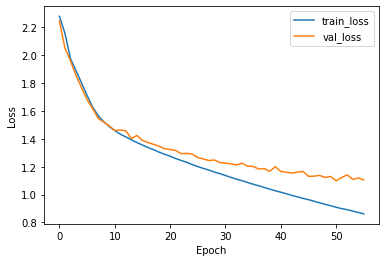

In [ ]:
plt.plot(base_history3.history['loss'], label='train_loss')
plt.plot(base_history3.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

313/313 - 1s - loss: 1.0988 - accuracy: 0.6229
Test Loss:  1.0988415479660034  , Test Accuracy:  0.6229000091552734


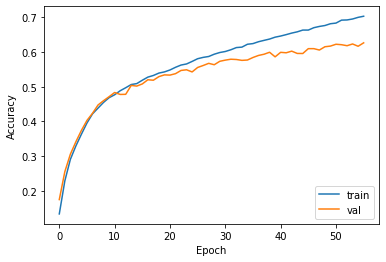

In [ ]:
plt.plot(base_history3.history['accuracy'], label='train')
plt.plot(base_history3.history['val_accuracy'], label = 'val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = base_model3.evaluate(x_test_norm,  y_test, verbose=2)
print('Test Loss: ',test_loss,' , Test Accuracy: ',test_acc)

Relu: with base model kernal size 3 accuracy was 64.26% with low varience   

Tanh: With base model kernal size 3 the accuracy was 70.47% with low varience with size 2 68.69% with size 4 accuracy 70.02% with high varince,   

Leaky Relu : 0.001 with size 3 accuracy was 62.23% with less varience and with size 4 accuracy is 62.29 % with not smooth curve   

Swish : 0.001 with size 3 accuracy was 57.91% with less varience and with size 2 accuracy is 59.21 %   

## I find that model with kernel size 3 and acitivation function tanh brought the best model accuracy with low varience and less overfitting so we will be using this model for other questions.

# Question 6: different initialization methods

In [ ]:
base_model4 = models.Sequential([
                             layers.Conv2D(32, (3, 3), kernel_initializer='glorot_uniform',activation='tanh', input_shape=(32, 32, 3), padding='SAME'),
                             layers.Conv2D(64, (3, 3), kernel_initializer='glorot_uniform',activation='tanh', padding='SAME'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(64, (3, 3), kernel_initializer='glorot_uniform',activation='tanh'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Flatten(),
                             layers.Dense(128,kernel_initializer='glorot_uniform',activation='tanh'),
                             layers.Dense(10)
                             ])

In [ ]:
base_opt4 = tf.keras.optimizers.SGD(lr=0.001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
base_model4.compile(optimizer=base_opt4, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

base_history4 = base_model4.fit(x_train_norm, y_train, epochs=100, batch_size=32,verbose=2,validation_split=0.2, callbacks=[es])

Epoch 1/100
1250/1250 - 7s - loss: 2.1979 - accuracy: 0.2184 - val_loss: 2.0659 - val_accuracy: 0.2990
Epoch 2/100
1250/1250 - 6s - loss: 1.9681 - accuracy: 0.3189 - val_loss: 1.9026 - val_accuracy: 0.3361
Epoch 3/100
1250/1250 - 6s - loss: 1.8575 - accuracy: 0.3555 - val_loss: 1.8262 - val_accuracy: 0.3623
Epoch 4/100
1250/1250 - 6s - loss: 1.7820 - accuracy: 0.3807 - val_loss: 1.7589 - val_accuracy: 0.3849
Epoch 5/100
1250/1250 - 6s - loss: 1.7151 - accuracy: 0.4026 - val_loss: 1.6960 - val_accuracy: 0.4031
Epoch 6/100
1250/1250 - 6s - loss: 1.6603 - accuracy: 0.4178 - val_loss: 1.6521 - val_accuracy: 0.4228
Epoch 7/100
1250/1250 - 6s - loss: 1.6180 - accuracy: 0.4329 - val_loss: 1.6130 - val_accuracy: 0.4322
Epoch 8/100
1250/1250 - 6s - loss: 1.5832 - accuracy: 0.4450 - val_loss: 1.5844 - val_accuracy: 0.4402
Epoch 9/100
1250/1250 - 6s - loss: 1.5526 - accuracy: 0.4537 - val_loss: 1.5583 - val_accuracy: 0.4501
Epoch 10/100
1250/1250 - 6s - loss: 1.5246 - accuracy: 0.4656 - val_loss:

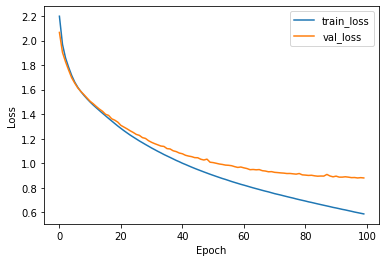

In [ ]:
plt.plot(base_history4.history['loss'], label='train_loss')
plt.plot(base_history4.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

313/313 - 1s - loss: 0.8871 - accuracy: 0.6938
Test Loss:  0.8871345520019531  , Test Accuracy:  0.6937999725341797


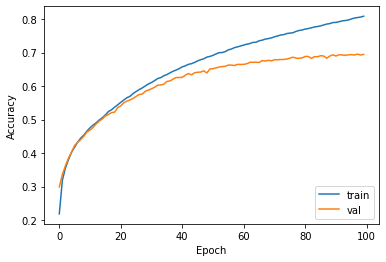

In [ ]:
plt.plot(base_history4.history['accuracy'], label='train')
plt.plot(base_history4.history['val_accuracy'], label = 'val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = base_model4.evaluate(x_test_norm,  y_test, verbose=2)
print('Test Loss: ',test_loss,' , Test Accuracy: ',test_acc)

Uniform :
1.   Tanh: With base model kernal size 3 the accuracy was 67.04% with low varience with size 2 accuracy was 60.20% with size 4 accuracy 68.71% with low varince
2.   Relu : 0.001 with size 3 accuracy was 59.88% with low varience, with size 4 accuracy 62.21% with low varince and with size 2 accuracy is 59.36 %

Normal :
1.   Tanh: With base model kernal size 3 the accuracy was 67.79% with low varience with size 4 accuracy 67.67% with low varince
2.   Relu : 0.001 with size 3 accuracy was 64.99% with low varience, with size 4 accuracy 66.60% but all with not smooth graph

Glorot Normal :
1.   Tanh: With base model kernal size 3 the accuracy was 69.82% with size 4 accuracy 69.21% with low varince
2.   Relu : 0.001 with size 3 accuracy was 62.23% with low varience, with size 4 accuracy 62.63% but with high loss compared to others

Glorot Uniform :
1.   Tanh: With base model kernal size 3 the accuracy was 69.38% with size 4 accuracy 68.38% with low varince
2.   Relu : 0.001 with size 3 accuracy was 60.82% with low varience, with size 4 accuracy 63.09% but with high loss compared to others

## Overall I find that Glorot Normal weight initialization gave best results with tanh activation function with kernal size 3 0r 4 also glorot Uniform produced similar results.

# Question 7: Regularizations   
## Droupout:

In [ ]:
base_model5 = models.Sequential([
                             layers.Conv2D(32, (4, 4), kernel_initializer='glorot_normal',activation='tanh', input_shape=(32, 32, 3), padding='SAME'),
                             layers.Conv2D(64, (4, 4), kernel_initializer='glorot_normal',activation='tanh', padding='SAME'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Dropout(0.4),
                             layers.Conv2D(64, (4, 4), kernel_initializer='glorot_normal',activation='tanh'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Dropout(0.4),
                             layers.Flatten(),
                             layers.Dense(128,kernel_initializer='glorot_normal',activation='tanh'),
                             #layers.Dropout(0.25),
                             layers.Dense(10)
                             ])

In [ ]:
base_opt5 = tf.keras.optimizers.SGD(lr=0.001, momentum=0.4)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
base_model5.compile(optimizer=base_opt5, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

base_history5 = base_model5.fit(x_train_norm, y_train, epochs=100, batch_size=32,verbose=2,validation_split=0.2, callbacks=[es])

Epoch 1/100
1250/1250 - 8s - loss: 2.1450 - accuracy: 0.2075 - val_loss: 1.9828 - val_accuracy: 0.2819
Epoch 2/100
1250/1250 - 8s - loss: 1.9109 - accuracy: 0.3119 - val_loss: 1.8084 - val_accuracy: 0.3597
Epoch 3/100
1250/1250 - 8s - loss: 1.7770 - accuracy: 0.3664 - val_loss: 1.7152 - val_accuracy: 0.3918
Epoch 4/100
1250/1250 - 8s - loss: 1.6886 - accuracy: 0.3929 - val_loss: 1.6616 - val_accuracy: 0.4051
Epoch 5/100
1250/1250 - 8s - loss: 1.6319 - accuracy: 0.4114 - val_loss: 1.6355 - val_accuracy: 0.4104
Epoch 6/100
1250/1250 - 8s - loss: 1.5948 - accuracy: 0.4270 - val_loss: 1.5796 - val_accuracy: 0.4330
Epoch 7/100
1250/1250 - 8s - loss: 1.5590 - accuracy: 0.4403 - val_loss: 1.5529 - val_accuracy: 0.4436
Epoch 8/100
1250/1250 - 8s - loss: 1.5350 - accuracy: 0.4493 - val_loss: 1.5356 - val_accuracy: 0.4475
Epoch 9/100
1250/1250 - 8s - loss: 1.5020 - accuracy: 0.4601 - val_loss: 1.5321 - val_accuracy: 0.4464
Epoch 10/100
1250/1250 - 8s - loss: 1.4717 - accuracy: 0.4694 - val_loss:

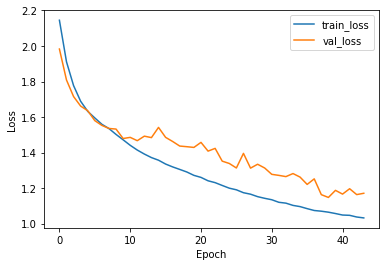

In [ ]:
plt.plot(base_history5.history['loss'], label='train_loss')
plt.plot(base_history5.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

313/313 - 1s - loss: 1.1764 - accuracy: 0.5938
Test Loss:  1.1764286756515503  , Test Accuracy:  0.5938000082969666


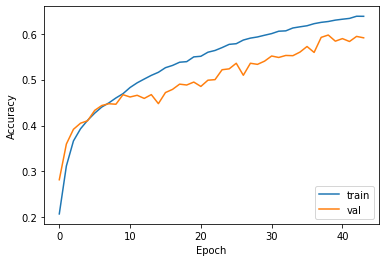

In [ ]:
plt.plot(base_history5.history['accuracy'], label='train')
plt.plot(base_history5.history['val_accuracy'], label = 'val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = base_model5.evaluate(x_test_norm,  y_test, verbose=2)
print('Test Loss: ',test_loss,' , Test Accuracy: ',test_acc)


Dropout 0.25 :
1.   Glorot Normal: with Tanh, SGD(0.001, 0.4 mm) kernal size 3 the accuracy was 70.87% with size 4 accuracy 71.88% with very low varince   
with SGD(0.001, 0.6 mm) kernal size 3 the accuracy was 70.18% with size 4 accuracy 72.78% with very low varince

Dropout 0.4 :
1.   Glorot Normal: with Tanh, SGD(0.001, 0.4 mm) kernal size 3 the accuracy was 55.42% with size 4 accuracy 59.38% with very low varince   
with SGD(0.001, 0.6 mm) kernal size 3 the accuracy was 59.35% with size 4 accuracy 70.04% with very low varince

## Here Dropout 0.4 is doing too much regularization so with droupout 0.25 gave best reslts wth kernal size 4

### Batch Normalization
Batch Norm with Dropout 0.25 :
1.   Glorot Normal: with Tanh, SGD(0.001, 0.4 mm) kernal size 4 accuracy 57.88% with very low varince   
with SGD(0.001, 0.6 mm) kernal size 4 accuracy 62.55% with very low varince

Only Batch Norm :
1.   Glorot Normal: with Tanh, SGD(0.001, 0.4 mm) kernal size 4 accuracy 67.21% with very little more varince   
with SGD(0.001, 0.6 mm) kernal size 4 accuracy 67.12% with very low varince

## Here adding batch normalization with or without dropout did not help in regularizing the model.

In [ ]:
'''
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
# creating image generaor object
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# creating train data with 40k images and val data with 10k images
train_aug = datagen.flow(x_train_norm[:40000], y_train[:40000], batch_size=32)
val_aug = datagen.flow(x_train_norm[40000:], y_train[40000:], batch_size=32)
print(len(train_aug), len(val_aug))# 1250 313
# lengths of train and val data is 1250 and 313 where each batch is of 32 size which gives total train data size of 50000 images 

x_gen,y_gen = val_aug.next()
print(x_gen.shape)#(32, 32, 32, 3)


from keras.layers.normalization import BatchNormalization
base_model7 = models.Sequential([
                             layers.Conv2D(32, (4, 4), kernel_initializer='glorot_normal',activation='tanh', input_shape=(32, 32, 3), padding='SAME'),
                             layers.Conv2D(64, (4, 4), kernel_initializer='glorot_normal',activation='tanh', padding='SAME'),
                             BatchNormalization(),
                             layers.MaxPooling2D((2, 2)),
                             layers.Dropout(0.25),
                             layers.Conv2D(64, (4, 4), kernel_initializer='glorot_normal',activation='tanh'),
                             BatchNormalization(),
                             layers.MaxPooling2D((2, 2)),
                             layers.Dropout(0.25),
                             layers.Flatten(),
                             layers.Dense(128,kernel_initializer='glorot_normal',activation='tanh'),
                             layers.Dense(10)
                             ])'''

"\n# Data Augmentation\nfrom keras.preprocessing.image import ImageDataGenerator\n# creating image generaor object\ndatagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)\n# creating train data with 40k images and val data with 10k images\ntrain_aug = datagen.flow(x_train_norm[:40000], y_train[:40000], batch_size=32)\nval_aug = datagen.flow(x_train_norm[40000:], y_train[40000:], batch_size=32)\nprint(len(train_aug), len(val_aug))# 1250 313\n# lengths of train and val data is 1250 and 313 where each batch is of 32 size which gives total train data size of 50000 images \n\nx_gen,y_gen = val_aug.next()\nprint(x_gen.shape)#(32, 32, 32, 3)\n\n\nfrom keras.layers.normalization import BatchNormalization\nbase_model7 = models.Sequential([\n                             layers.Conv2D(32, (4, 4), kernel_initializer='glorot_normal',activation='tanh', input_shape=(32, 32, 3), padding='SAME'),\n                             layers.Conv2D(64, (4, 4), kernel_i

# Data Augmentation helps in increasing more sample of data from thge existing once's in different dimensions and forms to learn every possible form of a image
Data Augmentation with Dropout and Batch Norm :
1.   Glorot Normal: with Tanh, SGD(0.001, 0.6 mm) kernal size 4 accuracy 12.20% with very low varince   

### using Data Augmentation did not help with or without dropout and batch normalization in regularizing the model infact the model performed very badly.

# Final Model:
 creating a new model with tested best parametrs and adding 1 more convolutional layer to improve accuracy

In [ ]:
final_model = models.Sequential([
                             layers.Conv2D(32, (4, 4), kernel_initializer='glorot_normal',activation='tanh', input_shape=(32, 32, 3), padding='SAME'),
                             layers.Conv2D(64, (4, 4), kernel_initializer='glorot_normal',activation='tanh', padding='SAME'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Dropout(0.25),
                             layers.Conv2D(64, (4, 4), kernel_initializer='glorot_normal',activation='tanh'),
                             layers.Conv2D(64, (4, 4), kernel_initializer='glorot_normal',activation='tanh'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Dropout(0.25),
                             layers.Flatten(),
                             layers.Dense(128,kernel_initializer='glorot_normal',activation='tanh'),
                             layers.Dense(10)
                             ])

In [ ]:
final_opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.6)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
final_model.compile(optimizer=final_opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

final_history = final_model.fit(x_train_norm,y_train, epochs=100, batch_size=32,verbose=2,validation_split=0.2, callbacks=[es])

Epoch 1/100
1250/1250 - 8s - loss: 2.0107 - accuracy: 0.2632 - val_loss: 1.8051 - val_accuracy: 0.3544
Epoch 2/100
1250/1250 - 8s - loss: 1.7503 - accuracy: 0.3730 - val_loss: 1.6614 - val_accuracy: 0.4051
Epoch 3/100
1250/1250 - 8s - loss: 1.6385 - accuracy: 0.4095 - val_loss: 1.5762 - val_accuracy: 0.4300
Epoch 4/100
1250/1250 - 8s - loss: 1.5638 - accuracy: 0.4370 - val_loss: 1.5079 - val_accuracy: 0.4547
Epoch 5/100
1250/1250 - 8s - loss: 1.4818 - accuracy: 0.4669 - val_loss: 1.4273 - val_accuracy: 0.4910
Epoch 6/100
1250/1250 - 8s - loss: 1.4187 - accuracy: 0.4921 - val_loss: 1.4182 - val_accuracy: 0.4986
Epoch 7/100
1250/1250 - 8s - loss: 1.3708 - accuracy: 0.5130 - val_loss: 1.3578 - val_accuracy: 0.5166
Epoch 8/100
1250/1250 - 8s - loss: 1.3347 - accuracy: 0.5239 - val_loss: 1.2925 - val_accuracy: 0.5468
Epoch 9/100
1250/1250 - 8s - loss: 1.2925 - accuracy: 0.5392 - val_loss: 1.2565 - val_accuracy: 0.5567
Epoch 10/100
1250/1250 - 8s - loss: 1.2539 - accuracy: 0.5564 - val_loss:

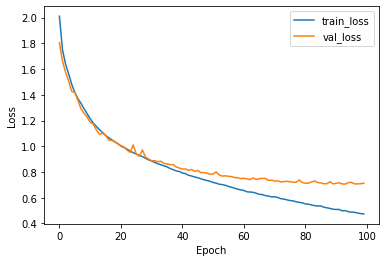

In [ ]:
plt.plot(final_history.history['loss'], label='train_loss')
plt.plot(final_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.3, 1])
plt.legend(loc='upper right')

313/313 - 1s - loss: 0.7289 - accuracy: 0.7576
Test Loss:  0.7288649678230286  , Test Accuracy:  0.7576000094413757


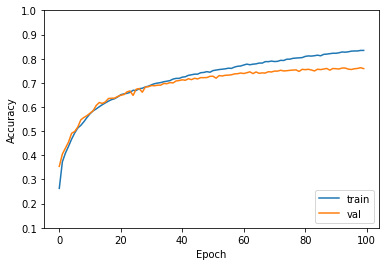

In [ ]:
plt.plot(final_history.history['accuracy'], label='train')
plt.plot(final_history.history['val_accuracy'], label = 'val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = final_model.evaluate(x_test_norm,  y_test, verbose=2)
print('Test Loss: ',test_loss,' , Test Accuracy: ',test_acc)

### Accuracy is 75.76%, Finally we get the model with lowest loss and highest accuracy and with very low overfitting with the help of Dropout, Normalized data, Tanh Activation function, kernal size 4, SGD optimizer with 0.4 mommentum and glorot_Normal(Xavier) kernel initializer. 